# CNN 遥感图像分类项目

## 数据说明
This is a 21 class land use image dataset meant for research purposes. 
There are 100 images for each of the following classes:
+ agricultural
+ airplane
+ baseballdiamond
+ beach
+ buildings
+ chaparral
+ denseresidential
+ forest
+ freeway
+ golfcourse
+ harbor
+ intersection
+ mediumresidential
+ mobilehomepark
+ overpass
+ parkinglot
+ river
+ runway
+ sparseresidential
+ storagetanks
+ tenniscourt

Each image measures 256x256 pixels.

The images were manually extracted from large images from the USGS National Map Urban Area Imagery collection for various urban areas around the country. The pixel resolution of this public domain imagery is 1 foot.

Download site: http://weegee.vision.ucmerced.edu/datasets/landuse.html

# Day 1. 图像文件及图像处理

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model,to_categorical
from skimage.transform import resize
import cv2
from PIL import Image
import os
from shutil import copyfile

In [ ]:
#!pip freeze 

## Download the dataset and Extract to 'data' directory

Download file and extract under data sub-directory. Check it on your computer. 
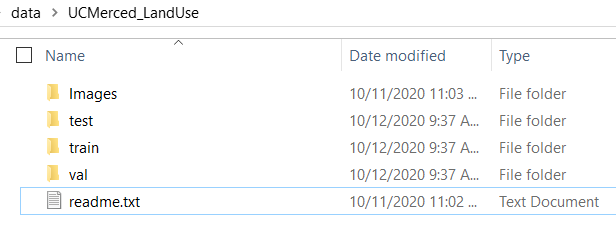

Check image categories under "Images". 
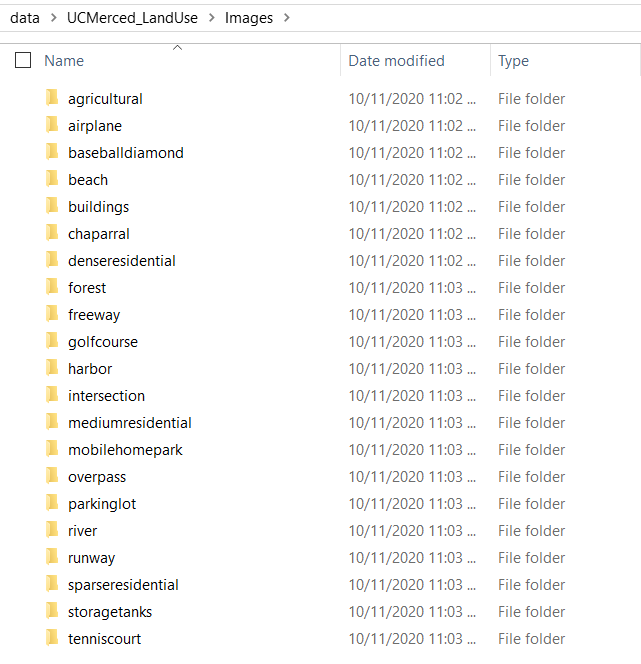

Check image file under one category:
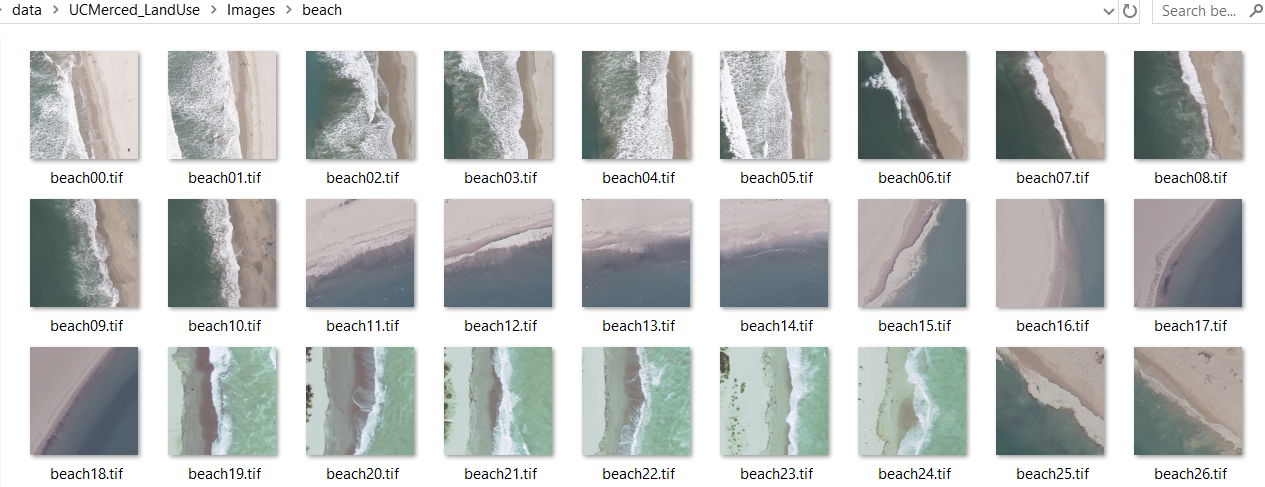

# Use Python to check Image files

os.listdir() method in python is used to get the list of all files and directories in the specified directory. If we don’t specify any directory, then list of files and directories in the current working directory will be returned.

In [ ]:
Image_directory = 'data/UCMerced_LandUse/Images'
category_names_all = os.____(Image_directory)
print('Total categories: {}'.format(len(category_names_all)))

In [ ]:
print(category_names_all)

Show number of images under each category

In [ ]:
for category in category_names_all:
    print('{}:{}'.format(category,len([name for name in os.listdir(Image_directory+'/'+category) ])))

# Load image data in Python

Select several categories only for the project to reduce the computation time

In [ ]:
category_names = [
 'agricultural',
 'forest',
 'beach',
 'runway'
]

Filename format sample: agricultural00.tif

In [ ]:
print('{:02d}.tif'.format(1))

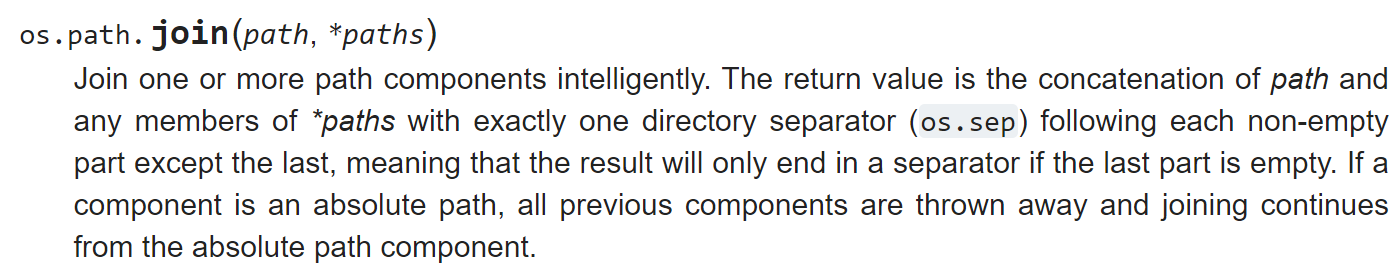

In [ ]:
os.sep

In [ ]:
print(os.path.join(Image_directory, category_names[0], category_names[0]+'{:02d}.tif'.format(1)))


In [ ]:
Image_directory = 'data/UCMerced_LandUse/Images'

In [ ]:
num_images = 100  # per category
nb_classes = ____(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [ ]:
# Load the original dataset
images_orig = []
labels_num = []

for i in range(len(category_names)):    
    # load all images per class
    for j in range(num_images): 
        # get the path of one image file 
        img_path = os.path.join(Image_directory, category_names[i], category_names[i]+'{:02d}.tif'.format(j))
        
        # read image
        new_image = plt.imread(img_path) 
        # resize to (64,64)
        resized_image = resize(new_image, (patch_size//4, patch_size//4, channels))
        arr = np.asarray(resized_image)
        
        # add image 
        images_orig.append(arr)
        
        # add label (label = i)
        labels_num.append([____])

images_orig = np.array(images_orig)

labels_num = np.array(labels_num)

# Save the numpy datasets
np.save('data/UCMerced_images_orig_4Class.npy', images_orig)
np.save('data/UCMerced_labels_num_4Class.npy', labels_num)      

In [ ]:
# Load the numpy datasets
images_orig = np.load('data/UCMerced_images_orig_4Class.npy')
labels_num = np.load('data/UCMerced_labels_num_4Class.npy')

Create a one-hot vector from all the categories identified in the dataset. Each one-hot vector can be thought of as a probability distribution, which is why by learning to predict it, the model will output a probability that an example belongs to any of the categories.
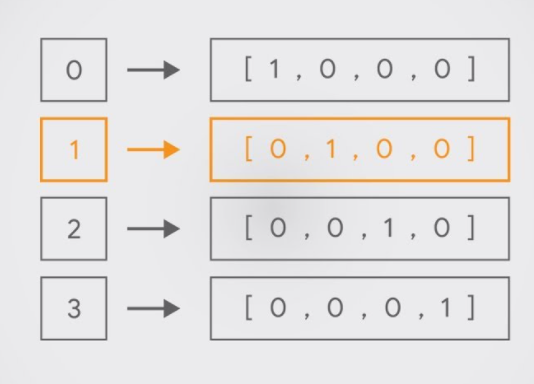

<b>keras.utils.to_categorical:</b> This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [ ]:
# Convert labels to categorical 'one hot encoded vector' 
# --> required format for sigmoid/softmax cross-entropy loss.
# Create an array of zeros with length nb_classes and put a 1 at the index of the true label.
labels = _______(labels_num, nb_classes)

print('Orginal Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels_num[i])

print('One-hot encoded Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels[i])

In [ ]:
print('\nImages shape: {}'.format(images_orig.shape))
print('\nLabel shape: {}'.format(labels.shape))

每个图像的shape

In [ ]:
images_orig[100].shape

In [ ]:
images_orig.min(), images_orig.max()

第100个图像的第(0,0)个像素：

In [ ]:
images_orig[100][0][0]

# Visualize the images



In [ ]:
# VISUALIZE IMAGES
def plotImages( images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()
    plt.show()

# Plot some examples for each category    
def plot_examples_per_category():
    for i in range(nb_classes):
        print(category_names[i])
        images_to_print = images_orig[i*num_images:(i+1)*num_images]
        np.random.seed(2020)
        np.random.shuffle(images_to_print)
        print(images_to_print.shape)
        plotImages(images_to_print)

plot_examples_per_category()

# Split train, val and test

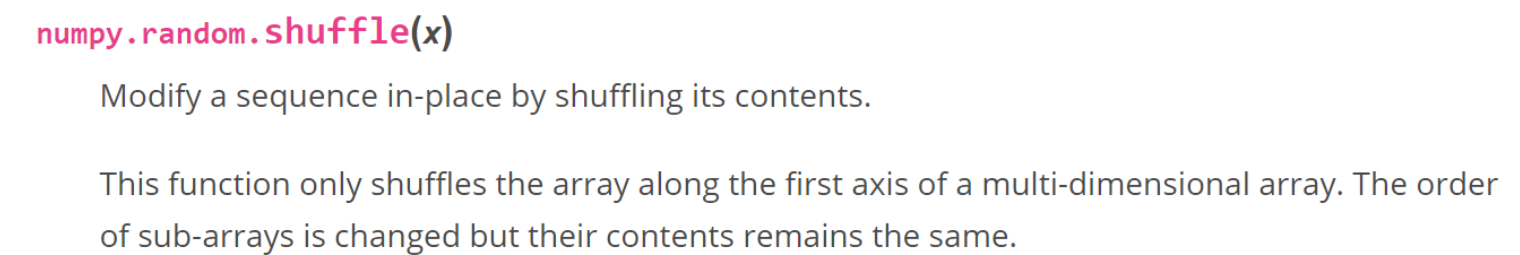

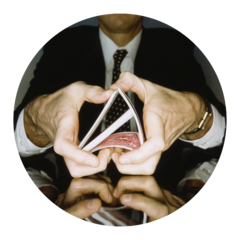

Split data into training, validation and test

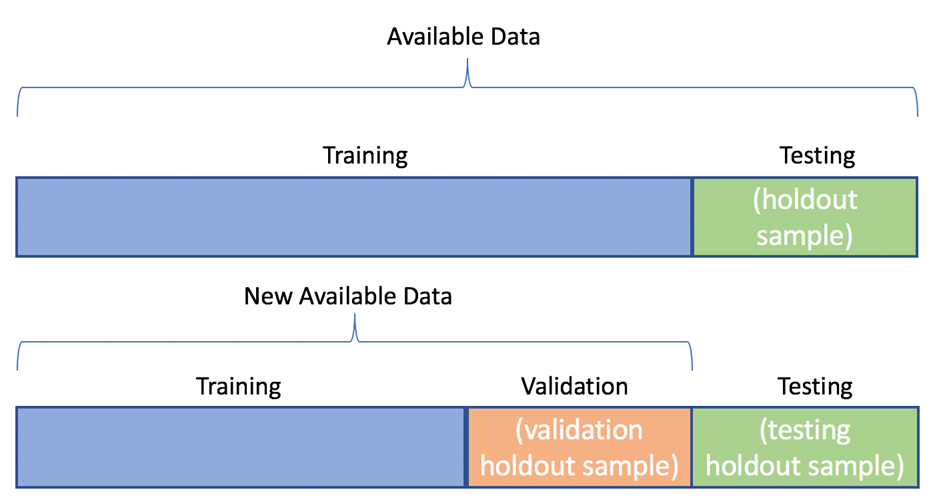

In [ ]:
nb_images = images_orig.shape[0]
nb_images

In [ ]:
shuffled_indices = np.___(nb_images)
shuffled_indices[:10],shuffled_indices[-10:]

In [ ]:
np.random.seed(100)
np.random._____(shuffled_indices)
shuffled_indices[:10],shuffled_indices[-10:]

In [ ]:
training_indices = shuffled_indices[:int(____*nb_images)]               # 60% for training
val_indices = shuffled_indices[int(___*nb_images):int(___*nb_images)]  # 20% for val
test_indices = shuffled_indices[int(____*nb_images):]                   # 20% for test

In [ ]:
X_train = images_orig[training_indices]
X_val = images_orig[val_indices]
X_test = images_orig[test_indices]

y_train = labels[training_indices]
y_val = labels[val_indices]
y_test = labels[test_indices]

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape,)

# Alternative method using sklearn train_test_split
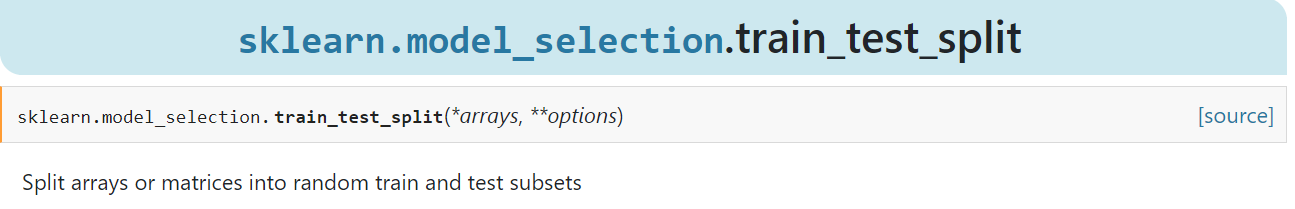

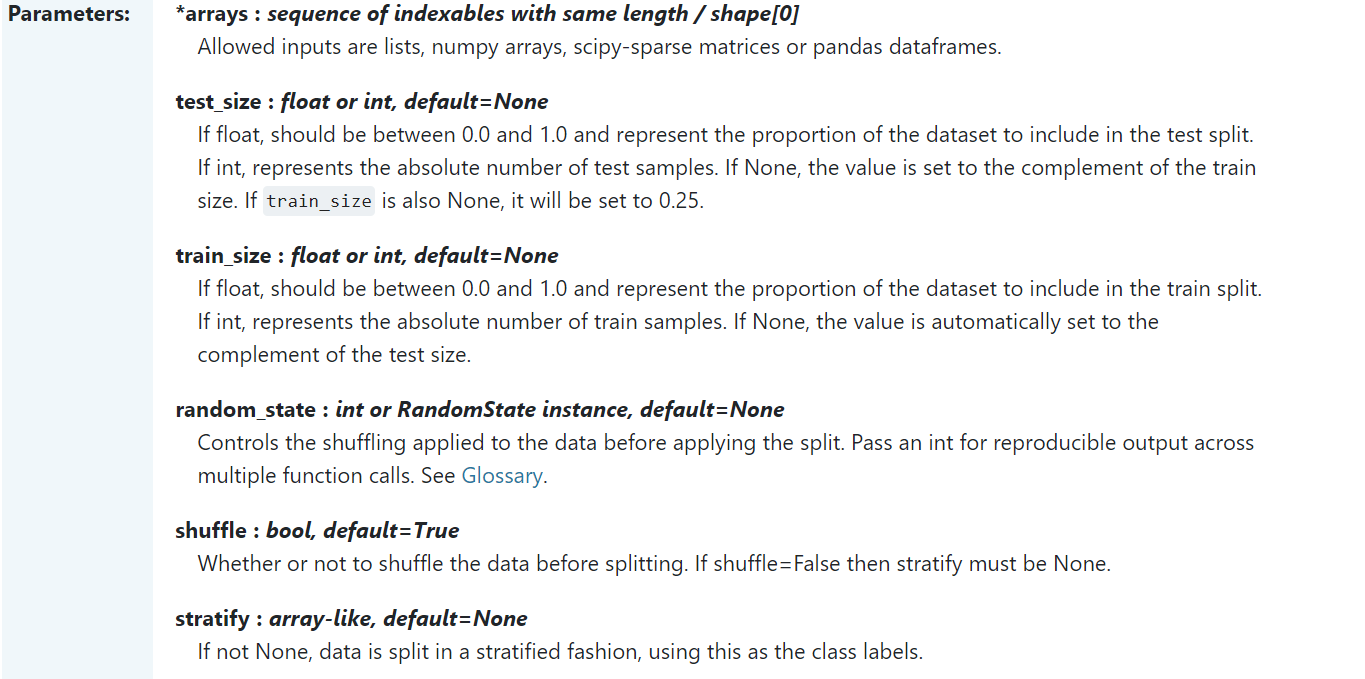

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(images_orig, labels, test_size= ___, random_state=2020)

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=___, random_state=2020) 

# 0.25 x 0.8 = 0.2

In [ ]:
print(X_train1.shape,X_val1.shape,X_test1.shape,y_train1.shape,y_val1.shape,y_test1.shape)

Check how many images per class in train/val/test

In [ ]:
def unique_counts(arr):
    unique, counts = np.unique(arr, axis=0, return_counts=True)
    unique_num = [np.where(r==1)[0][0] for r in unique] 
    print(dict(zip(unique_num, counts)))

In [ ]:
unique_counts(y_train)
unique_counts(y_val)
unique_counts(y_test)

In [ ]:
unique_counts(y_train1)
unique_counts(y_val1)
unique_counts(y_test1)

# Option: Copy train/val/test to new sub-directory

In [ ]:
# Collect all image paths
Image_directory = 'data/UCMerced_LandUse/Images'
image_paths = []
for i in range(len(category_names)):

    # load all images per class
    for j in range(num_images):        
        img_path = os.path.join(Image_directory, category_names[i], category_names[i]+'{:02d}.tif'.format(j))
        image_paths.append(img_path)

In [ ]:
image_paths = np.array(image_paths)
image_paths[0:3]

In [ ]:
train_paths = image_paths[training_indices]
val_paths = image_paths[val_indices]
test_paths = image_paths[test_indices]

In [ ]:
train_paths[0:3]

In [ ]:
# Copy images to train, val, test directories
import shutil

# make and empty directories:
for split in ['train', 'val', 'test']:
    dir = 'data/UCMerced_LandUse/'+split
    if os.path.exists(dir):
        # Delete all contents of a directory using shutil.rmtree() and  handle exceptions
        try:
           shutil.rmtree(dir)
        except:
           print('Error while deleting directory')

In [ ]:
def copy_images_to_split_directory(paths, split):
    for p in paths:
        dst=p.replace('UCMerced_LandUse/Images', 'UCMerced_LandUse/'+split)
        if not os.path.exists(os.path.dirname(dst)):
            os.makedirs(os.path.dirname(dst))
        copyfile(src=p, dst=dst)

copy_images_to_split_directory(train_paths, split='train')
copy_images_to_split_directory(val_paths, split='val')
copy_images_to_split_directory(test_paths, split='test')

Show the new directory and files 

In [ ]:
os.listdir('data/UCMerced_LandUse')

In [ ]:
for root, directories, files in os.walk('data/UCMerced_LandUse/val', topdown=False):
	for name in files:
		print(os.path.join(root, name))
	for name in directories:
		print(os.path.join(root, name))